<a href="https://colab.research.google.com/github/gregorywmorris/MLZoom2022/blob/main/week_three/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Guided Project
##Week Three

In [170]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

In [171]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [172]:
!wget $data -O data.csv

--2022-09-22 15:54:03--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 954.59K  --.-KB/s    in 0.02s   

2022-09-22 15:54:03 (47.3 MB/s) - ‘data.csv’ saved [977501/977501]



In [173]:
df = pd.read_csv('data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [174]:
df.head().T #Use transpose as an alternate way to see columns and data

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [175]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ', '_')

df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [176]:
df.dtypes # seniorcitizen is a number (0 or 1) and total charges should be a number

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [177]:
# pd.to_numeric(df.totalcharges) # ValueError: Unable to parse string "_" at position 488

In [178]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc.dtype

dtype('float64')

In [179]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [180]:
df.totalcharges = pd.to_numeric(tc) # Replace
# the totalcharges column with tc
df.totalcharges.dtype

dtype('float64')

In [181]:
df.totalcharges = df.totalcharges.fillna(0)

In [182]:
df.churn.isnull().sum()

0

In [183]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [184]:
df.churn = (df.churn == 'yes').astype(int)
# convert yes and no to 0 and 1
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# 3.3 Setting up the Validation Framework

In [185]:
train_test_split?
#help page

In [186]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

In [187]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [188]:
len(df_train)+ len(df_test)+ len(df_val) == len(df)

True

In [189]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [190]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values


In [191]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [192]:
df_full_train.totalcharges.dtype

dtype('float64')

# 3.4 EDA

In [193]:
df_full_train = df_full_train.reset_index(drop=True)

In [194]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [195]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [196]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [197]:
df_full_train.churn.value_counts(normalize=True) # 1 is the churn rate, showing as about 27%

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [198]:
global_churn = df_full_train.churn.mean()
round(global_churn, 2)

0.27

In [199]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [200]:
numerical = ['tenure','monthlycharges', 'totalcharges']
df_full_train[numerical].dtypes

tenure              int64
monthlycharges    float64
totalcharges      float64
dtype: object

In [201]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [202]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature Importance: Churn Rate and Risk Ratio

**Churn Rate**

In [203]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [204]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [205]:
global_churn

0.26996805111821087

Neglegable difference in churn if male of female. 

In [206]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [207]:
churn_with_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_with_partner

0.20503330866025166

In [208]:
global_churn - churn_with_partner 
# positive means less likely to churn, as that means it is less than global churn rate

0.06493474245795922

In [209]:
churn_no_partner = churn_male = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [210]:
global_churn - churn_no_partner # Negative means higher likelyhood of churn, as that means it is higher than the global churn

-0.05984095297455855

Churn is lower if with partner and higher if no partner

**Risk Ratio**

In [211]:
churn_no_partner / global_churn # ~22% higher risk

1.2216593879412643

In [212]:
churn_with_partner / global_churn # ~26% lower risk

0.7594724924338315

SELECT<br>
&nbsp;&nbsp;&nbsp;gender,<br>
&nbsp;&nbsp;&nbsp;AVG(churn),<br>
&nbsp;&nbsp;&nbsp;AVG(churn),<br>
&nbsp;&nbsp;&nbsp;AVG(churn) - global_churn As diff,<br>
&nbsp;&nbsp;&nbsp;AVG(chrun) / global_churn As risk<br>
FROM<br>
&nbsp;&nbsp;&nbsp;data<br>
GROUP BY<br>
&nbsp;&nbsp;&nbsp;gender;<br>

In [213]:
from IPython.display import display

In [214]:
for c in categorical:
  df_group =df_full_train.groupby(c).churn.agg(['mean', 'count'])
  df_group['diff'] = df_group['mean'] - global_churn
  df_group['risk'] = df_group['mean'] / global_churn
  display(df_group)
  print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# 3.6 Feature Importance: Mutual Importance

https://en.wikipedia.org/wiki/Mutual_information

In [215]:
from sklearn.metrics import mutual_info_score as mis

In [216]:
mis(df_full_train.churn, df_full_train.contract) # higher number, more important

0.0983203874041556

In [217]:
mis(df_full_train.gender, df_full_train.churn) # lower number less important

0.0001174846211139946

In [218]:
mis(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [219]:
def mutual_info_churn_score(series):
  return mis(series, df_full_train.churn)
# this function allows us to compare all the colums to the target variable. To determine the degree of affect, see above.

In [220]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False) # Sorted so highest first

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Feature Importance: Correlation

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

https://www.investopedia.com/terms/c/correlationcoefficient.asp

In [221]:
df_full_train.tenure.max()

72

In [222]:
df_full_train[numerical].corrwith(df_full_train.churn) # Add .abs() if we just wanted the number without direction

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Negative correlation means that the higher the number the more it negatively affects the target value. 

In [223]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

In [224]:
df_full_train[df_full_train.tenure > 2].churn.mean() # Notice the moderate churn despite the high negative correlation above, this indicates more investigation is needed.

0.22478269658378816

In [225]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean() # High turnover for 2-12 months

0.3994413407821229

In [226]:
df_full_train[df_full_train.tenure > 12].churn.mean() # Once over 12 monts, churn is low

0.17634908339788277

A target for tenure would be to get customers past the 12 month mark.

The same investigation is needed for the other variables. 

In [227]:
# Monthly Charges
monthly_under_20 = df_full_train[df_full_train.monthlycharges <=20].churn.mean()
monthly_between_20_50 = df_full_train[(df_full_train.monthlycharges >20) & (df_full_train.monthlycharges <=50) ].churn.mean()
monthly_over_50 = df_full_train[df_full_train.monthlycharges >50].churn.mean()
monthly_under_20, monthly_between_20_50, monthly_over_50

(0.08795411089866156, 0.18340943683409436, 0.32499341585462205)

In [228]:
# Total Charges
total_under_20 = df_full_train[df_full_train.totalcharges <=20].churn.mean()
total_between_20_50 = df_full_train[(df_full_train.totalcharges >20) & (df_full_train.totalcharges <=50) ].churn.mean()
total_over_50 = df_full_train[df_full_train.totalcharges>50].churn.mean()
total_under_20, total_between_20_50, total_over_50


(0.3108108108108108, 0.45089285714285715, 0.2618065967016492)

Notice Total Charges does not follow the same growth as Monthly Charges. This may be due to other factors such as partners being on the same plan which reduces churn while increasin total bill. 

# 3.8 One-hot Encoding

Use Scikit-Learn to encode categorical features

In [229]:
from sklearn.feature_extraction import DictVectorizer

In [230]:
#df_train[categorical + numerical]

In [231]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records') 
#(orient='records') creates dictionay by row rather than the column
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [232]:
dv = DictVectorizer(sparse=False) # Must set variable, aliasing does not provide the same functionality. 
# Sparse matrix is used when there are a high number of 0s, we have turned it off

**.fit()**

In a nutshell: fitting is equal to training. Then, after it is trained, the model can be used to make predictions
From Stackoverflow:
https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

In [233]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [234]:
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [235]:
x_train = dv.transform(train_dicts)
x_train.shape

(4225, 45)

In [236]:
x_train = dv.fit_transform(train_dicts) # condense verson of fit and transform
x_train.shape

(4225, 45)

In [237]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(train_dicts) 

# 3.9 Logistic Regression

##How sigmoid works

sigmoid is probability

https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/

In [238]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [239]:
z = np.linspace(-7,5,51) # https://www.geeksforgeeks.org/numpy-linspace-python/

In [240]:
sigmoid(z)

array([9.11051194e-04, 1.15788692e-03, 1.47150060e-03, 1.86989753e-03,
       2.37590057e-03, 3.01841632e-03, 3.83402011e-03, 4.86893124e-03,
       6.18146089e-03, 7.84502303e-03, 9.95180187e-03, 1.26171607e-02,
       1.59848483e-02, 2.02329971e-02, 2.55807883e-02, 3.22954647e-02,
       4.06990536e-02, 5.11737009e-02, 6.41638764e-02, 8.01729122e-02,
       9.97504891e-02, 1.23467048e-01, 1.51871164e-01, 1.85427419e-01,
       2.24435986e-01, 2.68941421e-01, 3.18646266e-01, 3.72852234e-01,
       4.30453776e-01, 4.90001333e-01, 5.49833997e-01, 6.08259031e-01,
       6.63738697e-01, 7.15042106e-01, 7.61332715e-01, 8.02183889e-01,
       8.37534937e-01, 8.67611126e-01, 8.92831930e-01, 9.13725806e-01,
       9.30861580e-01, 9.44799462e-01, 9.56060185e-01, 9.65108591e-01,
       9.72347578e-01, 9.78118729e-01, 9.82706843e-01, 9.86346341e-01,
       9.89228270e-01, 9.91507137e-01, 9.93307149e-01])

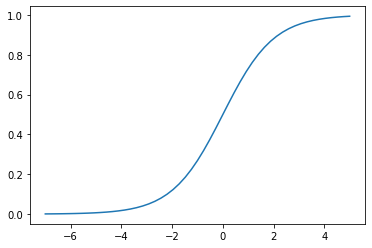

In [241]:
plt.plot(z, sigmoid(z))

In [242]:
sigmoid(1000000000) # can't go over 1

1.0

In [243]:
sigmoid(-1000000000) # can't go under 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.0

##Linear vs logistic regression

Linear is continuous output
Logistic is finite (either between two points or above / below a point

From Stackoverflow:

https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression 

From Analytics Vidhya:

https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/#:~:text=The%20Differences%20between%20Linear%20Regression,Logistic%20regression%20provides%20discreet%20output. 

In [244]:
def linear_regression(x_i):
  result = w_0

  for j in range(len(w)):
    result = result + x_i[j] * w[j]

  return result

In [245]:
def logistic_regression(x_i):
  score = w_0

  for j in range(len(w)):
    score = score + x_i[j] * w[j]

  result = sigmoid(score)
  return result

# 3.10 Training Logistic Regression with Scikit-Learn

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [248]:
model.intercept_[0] # biased weight

-0.10903461122930498

In [249]:
model.coef_[0].round(3) # these are the weights

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [250]:
model.predict(x_train) # hard predictions, 1 means churn in this case. We don't know the probability with this

array([0, 1, 1, ..., 1, 0, 1])

In [251]:
model.predict_proba(x_train) # Soft predictions, includes probabilities
# First row is probability of not churning (0), second is probability of churning (1). 

array([[0.90451531, 0.09548469],
       [0.32067017, 0.67932983],
       [0.36632206, 0.63367794],
       ...,
       [0.46838428, 0.53161572],
       [0.95746004, 0.04253996],
       [0.30127008, 0.69872992]])

In [252]:
model.predict_proba(x_train)[:,1]

array([0.09548469, 0.67932983, 0.63367794, ..., 0.53161572, 0.04253996,
       0.69872992])

In [253]:
y_pred = model.predict_proba(x_val)[:,1] # we only want the column that predicts churn

In [254]:
churn_descision = (y_pred >= 0.5)

In [256]:
df_val[churn_descision].customerid
#The company could consider sending promotional material to these customers based on the prediction

ValueError: ignored